<a href="https://colab.research.google.com/github/SIDIBEMoussa/LoanPrediction_Zindi_Competition/blob/main/Represention_de_Starter_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Africa Credit Challenge

The goals of this `starter notebook` are:

1. How to load data into a `Pandas` dataframe

2. How to `train` a basic machine learning model

3. How to `evaluate` the model

4. How to `save` your __submission__ following the required format.

<font color="red"><b>Note: This is just a starter notebook. It is by no means an ideal solution.</b></font>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

os.chdir("/content/drive/MyDrive/Data_Zindi_Loan/")

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_data = pd.read_csv('train_final.csv')
test_data = pd.read_csv('test_final.csv')

In [6]:
train_data["Central Bank Rate Change"] = train_data["Central Bank Rate Change"].astype(float)
test_data["Central Bank Rate Change"] = test_data["Central Bank Rate Change"].astype(float)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total_Amount                   68654 non-null  float64
 1   Total_Amount_to_Repay          68654 non-null  float64
 2   duration                       68654 non-null  int64  
 3   Amount_Funded_By_Lender        68654 non-null  float64
 4   Lender_portion_Funded          68654 non-null  float64
 5   Lender_portion_to_be_repaid    68654 non-null  float64
 6   target                         68654 non-null  int64  
 7   month_int                      68654 non-null  int64  
 8   day                            68654 non-null  int64  
 9   Unemployment rate              68654 non-null  float64
 10  month                          68654 non-null  int64  
 11  Year                           68654 non-null  int64  
 12  12-Month Inflation             68654 non-null 

In [8]:
correlation = train_data.corr()
correlation

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,month_int,day,Unemployment rate,...,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9,New_versus_Repeat_New Loan,New_versus_Repeat_Repeat Loan,MONTH_JAN,MONTH_JANUARY,interest_rate_spread_poly_2,Central Bank Rate Change
Total_Amount,1.000000,0.996759,0.354523,0.420987,-0.038000,0.426856,0.086043,-0.045442,-0.013807,-0.126868,...,0.013062,-0.004333,-0.006283,0.012531,0.000212,-0.000212,-0.000718,0.000718,-0.040833,NaN
Total_Amount_to_Repay,0.996759,1.000000,0.371108,0.410123,-0.036009,0.418614,0.087089,-0.042666,-0.011622,-0.118788,...,0.012472,-0.003875,-0.005881,0.012443,0.000732,-0.000732,-0.000605,0.000605,-0.038427,NaN
duration,0.354523,0.371108,1.000000,0.364851,-0.019972,0.394855,0.189889,-0.123320,-0.028572,-0.366579,...,0.058686,-0.006624,-0.023825,0.104804,0.057177,-0.057177,0.029723,-0.029723,-0.133540,NaN
Amount_Funded_By_Lender,0.420987,0.410123,0.364851,1.000000,0.093573,0.997542,0.101845,-0.088093,-0.018813,-0.192147,...,0.017234,-0.008702,-0.007683,0.039264,0.006747,-0.006747,0.013832,-0.013832,-0.070783,NaN
Lender_portion_Funded,-0.038000,-0.036009,-0.019972,0.093573,1.000000,0.085730,0.045418,-0.205753,0.045746,0.029730,...,-0.073728,-0.020016,-0.026728,0.060880,0.090109,-0.090109,0.131609,-0.131609,0.025008,NaN
Lender_portion_to_be_repaid,0.426856,0.418614,0.394855,0.997542,0.085730,1.000000,0.109517,-0.082307,-0.017702,-0.189994,...,0.017684,-0.007960,-0.007230,0.039615,0.008177,-0.008177,0.013608,-0.013608,-0.070626,NaN
target,0.086043,0.087089,0.189889,0.101845,0.045418,0.109517,1.000000,-0.068877,-0.023561,-0.098087,...,0.069455,0.047502,0.101137,0.064179,0.130334,-0.130334,0.092459,-0.092459,-0.133790,NaN
month_int,-0.045442,-0.042666,-0.123320,-0.088093,-0.205753,-0.082307,-0.068877,1.000000,-0.161448,0.185437,...,-0.204849,0.041924,0.002161,-0.076667,-0.059471,0.059471,0.037660,-0.037660,0.103431,NaN
day,-0.013807,-0.011622,-0.028572,-0.018813,0.045746,-0.017702,-0.023561,-0.161448,1.000000,0.064632,...,-0.019043,-0.003632,-0.017425,0.001317,-0.003637,0.003637,-0.000595,0.000595,0.038226,NaN
Unemployment rate,-0.126868,-0.118788,-0.366579,-0.192147,0.029730,-0.189994,-0.098087,0.185437,0.064632,1.000000,...,-0.079904,-0.009964,-0.011969,-0.100824,-0.026296,0.026296,0.003233,-0.003233,0.298783,NaN


In [9]:
train_data.shape,test_data.shape

((68654, 46), (18594, 46))

In [10]:
X = train_data.drop(['target'], axis=1)
y = train_data['target']

In [11]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA

In [12]:
scaler = RobustScaler()

X_scaled=StandardScaler().fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<Axes: title={'center': 'Distribution des caractéristiques'}>

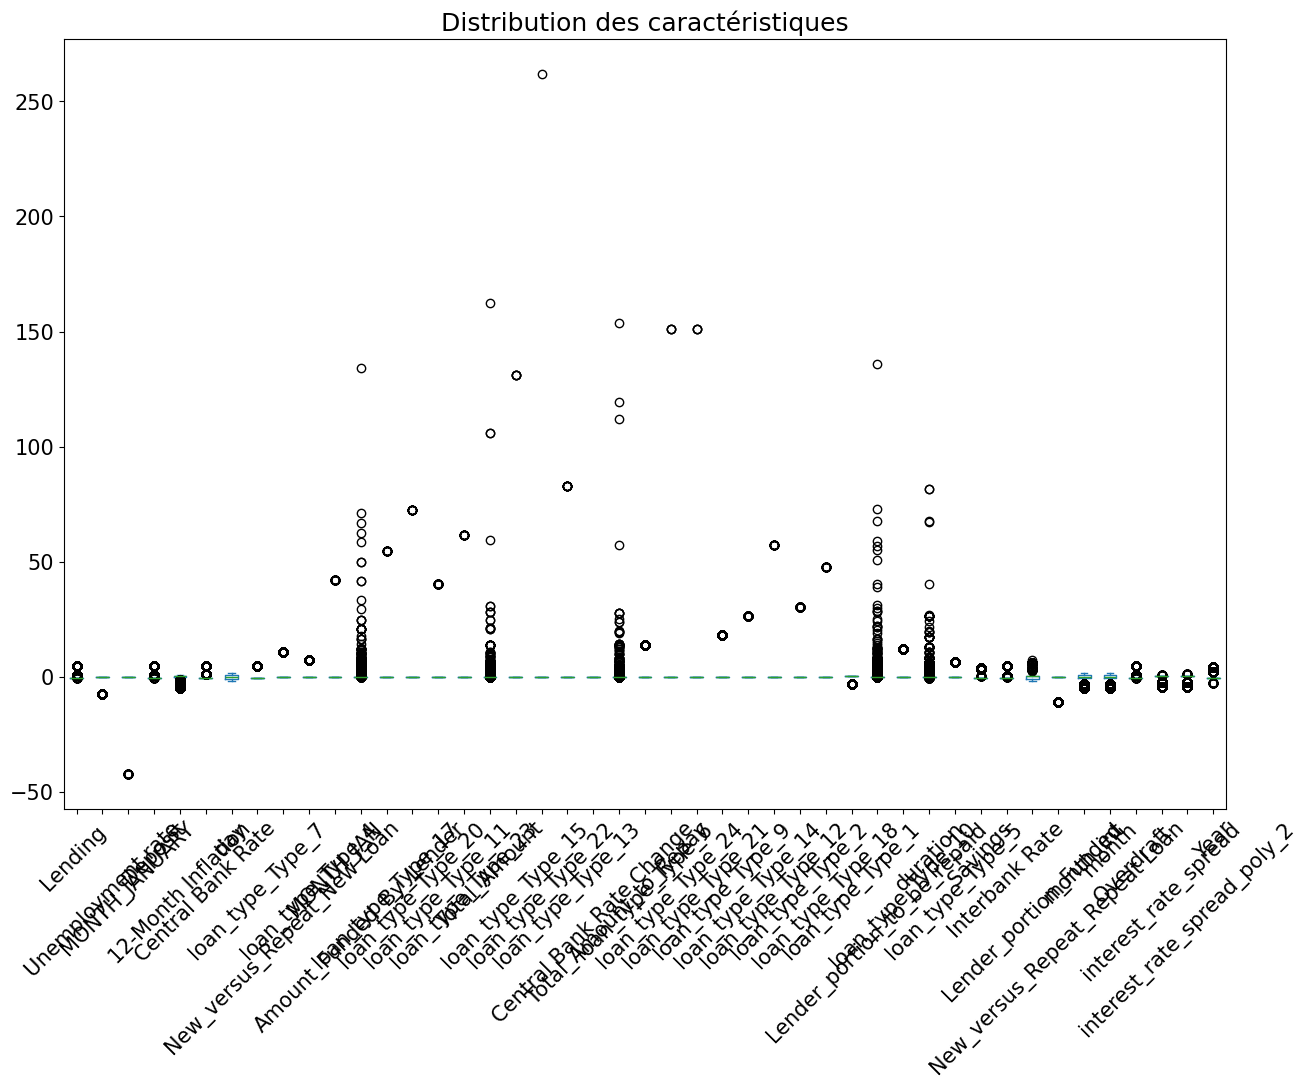

In [15]:
plt.rcParams.update({"font.size":15})
X_scaled=pd.DataFrame(X_scaled,columns=X.columns,index=X.index)
sorted_by_mean=X_scaled.mean().sort_values(ascending=True)
X_scaled[sorted_by_mean.index].plot(kind="box", figsize=(15,10),rot=45,title="Distribution des caractéristiques")

In [16]:
pca=PCA()
X_pca=pca.fit_transform(X_train)

In [21]:
col=["F"+str(i) for i in range(1,X_pca.shape[1]+1)]
X_pca=pd.DataFrame(X_pca,columns=col)

In [22]:
X_pca.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45
0,0.929850,-0.324145,0.458860,0.325436,0.212111,0.161919,-0.559372,0.068171,0.069807,-0.019093,...,8.505936e-16,1.268667e-15,0.0,8.931042e-16,-2.631322e-16,-5.308142e-16,-1.163892e-15,2.098295e-15,-1.641757e-16,-1.431737e-15
1,0.921908,-0.249109,0.046125,0.215327,0.083483,-0.026050,0.053570,-0.012119,-0.020775,-0.018277,...,-1.425364e-15,-1.284846e-15,0.0,5.877929e-16,-2.761134e-15,-8.777589e-16,-2.322687e-15,-1.221511e-16,1.778715e-15,7.894136e-15
2,1.120481,-0.555571,0.783042,1.402936,0.972657,0.355254,-0.503538,0.041773,0.051555,-0.033546,...,1.285488e-14,-8.130007e-16,0.0,-1.537166e-14,4.705116e-15,2.605566e-15,6.468891e-15,4.263230e-15,-2.242415e-14,-2.516275e-14
3,1.071652,-0.357904,0.218934,0.757076,0.490115,0.078560,0.107871,-0.035742,-0.030070,-0.023369,...,-2.868653e-15,-1.534646e-15,0.0,2.835994e-15,-1.484377e-15,4.822643e-16,-2.236721e-16,3.097496e-15,-1.440932e-15,5.562668e-15
4,-15.057811,-1.994318,1.040565,2.324735,-0.027229,-0.536582,0.271509,0.292412,-0.011746,-0.076107,...,4.873471e-14,1.139924e-14,0.0,-8.254943e-14,1.329062e-14,3.324083e-15,1.617814e-14,2.155389e-14,-6.764451e-14,-8.131753e-14


In [23]:
eigen_values=pca.explained_variance_ratio_
explained_variance=pd.Series(dict(zip(X_pca.columns,100.0*pca.explained_variance_ratio_)))

<Axes: title={'center': 'Inertie expliquée par axe factoriel'}>

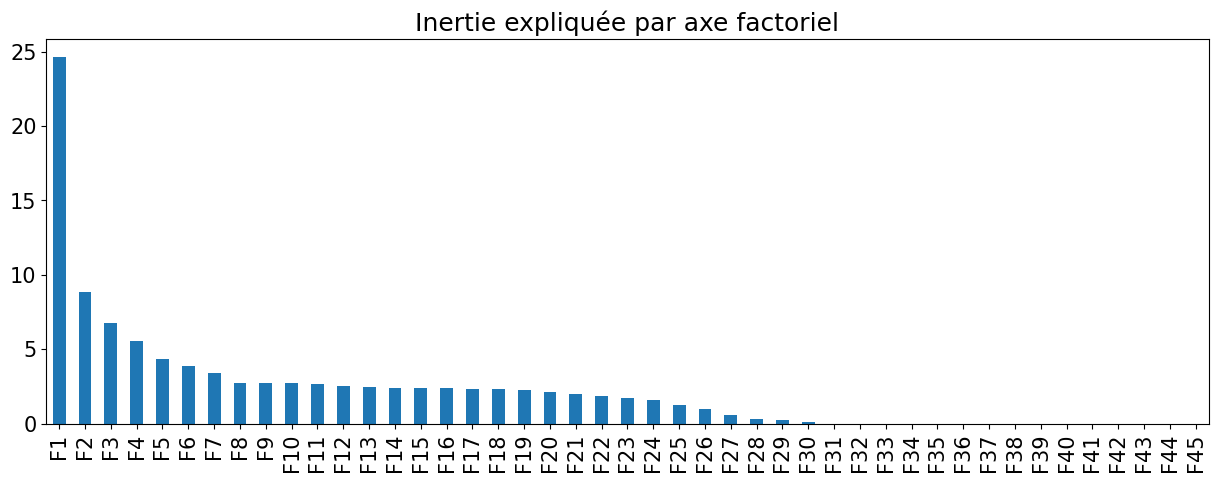

In [24]:
explained_variance.plot(kind="bar",title="Inertie expliquée par axe factoriel",figsize=(15,5))

In [25]:
explained_variance["F1"]+explained_variance["F2"]+explained_variance["F3"]

40.250427644316915

In [29]:
dict_colors={1:"red", 0:"green"}
y_colors=[dict_colors[yi] for yi in y_train]

<Axes: title={'center': 'Projection des individus sur le 1er plan factoriel'}, xlabel='F1', ylabel='F2'>

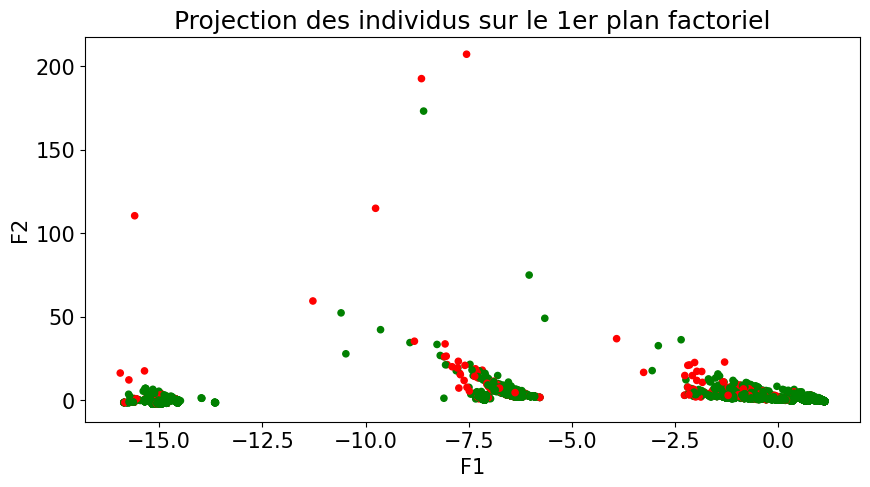

In [30]:
X_pca.plot(kind="scatter",x="F1",y="F2",figsize=(10,5),title="Projection des individus sur le 1er plan factoriel",color=y_colors)

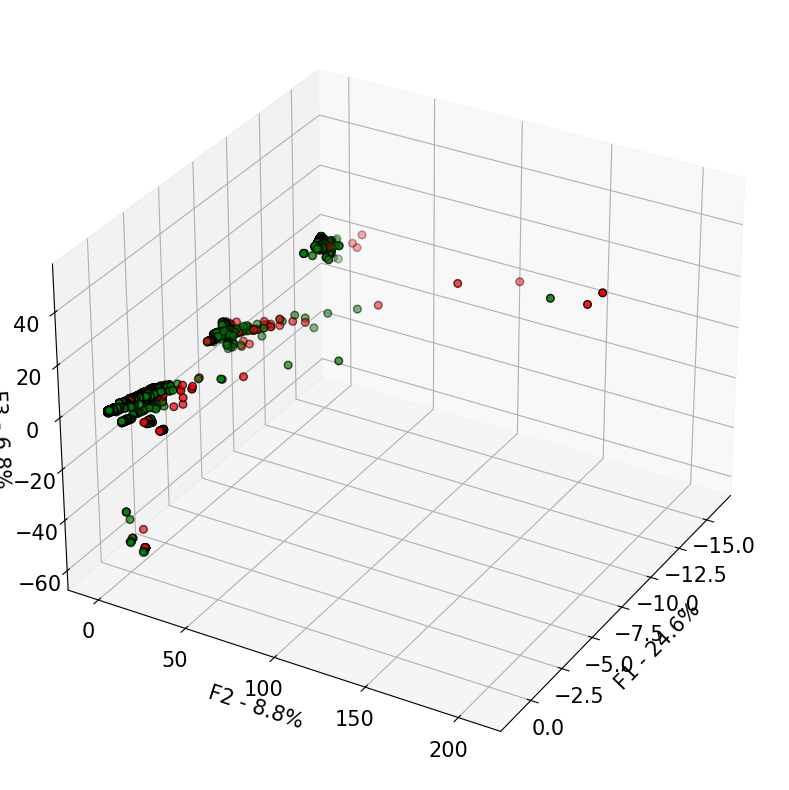

In [31]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(X_pca['F1'], X_pca['F2'], X_pca['F3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('F1 - ' + '{:.1f}%'.format(explained_variance['F1']))
ax.set_ylabel('F2 - ' + '{:.1f}%'.format(explained_variance['F2']))
ax.set_zlabel('F3 - ' + '{:.1f}%'.format(explained_variance['F3']))
ax.view_init(elev=30, azim=30)

In [32]:
from sklearn.manifold import TSNE

In [33]:
tsne=TSNE(n_components=3,init="pca",random_state=1, n_jobs=-1)

In [34]:
X_tsne=tsne.fit_transform(X_train)


AttributeError: 'TSNE' object has no attribute 'transform'

In [ ]:
X_tsne_test=tsne.tr

In [38]:
cols=["DIM"+str(c) for c in range(1,X_tsne.shape[1]+1)]
X_tsne=pd.DataFrame(X_tsne, columns=cols)
#X_tsne_test=pd.DataFrame(X_tsne_test, columns=cols)

X_tsne["target"]=y_train.values
#X_tsne_test["target"]=y_test.values

X_tsne.head()

,DIM1,DIM2,DIM3,target
0,-14.983804,6.207903,-18.943951,0
1,2.177524,-1.389878,-17.900341,0
2,7.687382,-33.762501,-27.504946,0
3,38.052986,-2.689001,-14.661394,0
4,-33.852646,-24.967899,-5.817386,0


In [ ]:
X_tsne.to_csv("X_tsne.csv",index=False)
X_tsne_test.to_csv("X_tsne_test.csv",index=False)

<Axes: xlabel='DIM1', ylabel='DIM2'>

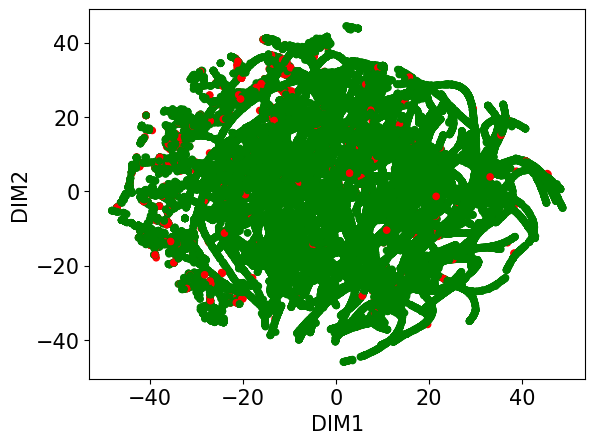

In [39]:
X_tsne.plot(kind="scatter",x="DIM1",y="DIM2",color=y_colors)

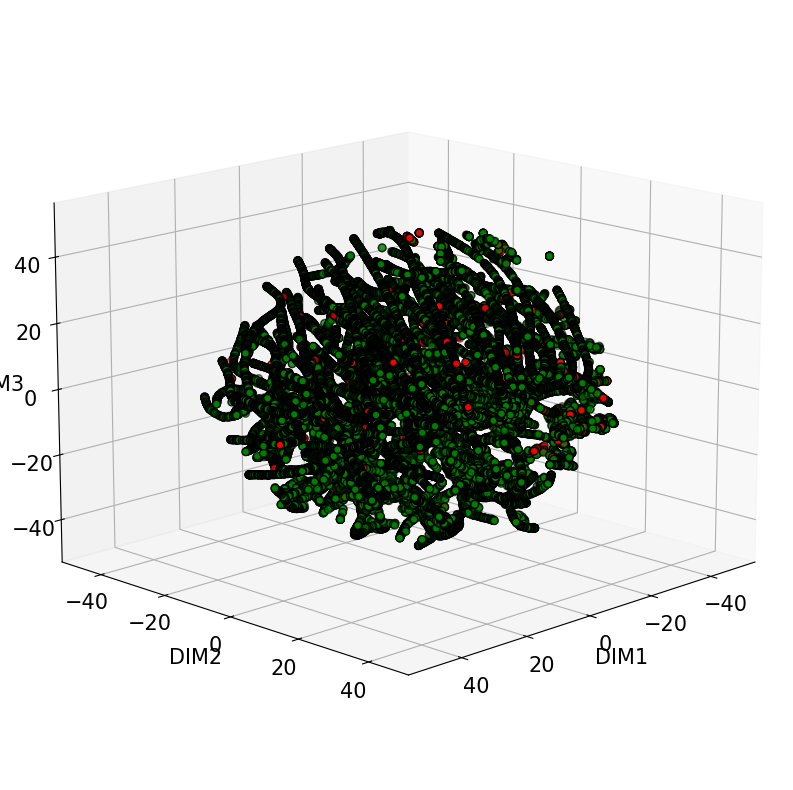

In [40]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)

In [48]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Supposons que vous ayez déjà vos données X_train et X_test
# Charger vos données (si ce n'est pas déjà fait)
train_data = pd.read_csv('train_final.csv')
test_data = pd.read_csv('test_final.csv')

# Préparer les données (si ce n'est pas déjà fait)
train_data["Central Bank Rate Change"] = train_data["Central Bank Rate Change"].astype(float)
test_data["Central Bank Rate Change"] = test_data["Central Bank Rate Change"].astype(float)

In [50]:
test_data = test_data.drop(['ID'], axis=1)

In [75]:
X = train_data.drop(['target'], axis=1)
y = train_data['target']

X_scaled = StandardScaler().fit_transform(X)
test_data_scaled = StandardScaler().fit_transform(test_data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Combiner les données d'entraînement et de test
X_combined = np.vstack((X_train, X_test,test_data_scaled))
size_train = X_train.shape[0]
size_test = X_test.shape[0]
size_test_data = test_data_scaled.shape[0]

In [52]:
# 2. Appliquer t-SNE aux données combinées
tsne = TSNE(n_components=3, init="pca", random_state=1, n_jobs=-1)
X_tsne_combined = tsne.fit_transform(X_combined)

In [79]:
# 3. Diviser le résultat t-SNE en données d'entraînement et de test
X_tsne_train = X_tsne_combined[:size_train, :]
X_tsne_test = X_tsne_combined[size_train:size_train+size_test, :]
test__tsne_data = X_tsne_combined[size_train+size_test:, :]

In [80]:
# Convertir en DataFrame si nécessaire
cols = ["DIM" + str(c) for c in range(1, X_tsne_train.shape[1] + 1)]
X_tsne_train = pd.DataFrame(X_tsne_train, columns=cols)
X_tsne_train["y"] = y_train.values
X_tsne_test = pd.DataFrame(X_tsne_test, columns=cols)
X_tsne_test["y"] = y_test.values
test__tsne_data = pd.DataFrame(test__tsne_data, columns=cols)

In [83]:
# Enregistrer les données si nécessaire
X_tsne_train.to_csv("./Reduced/X_tsne_train.csv", index=False)
X_tsne_test.to_csv("./Reduced/X_tsne_test.csv", index=False)
test__tsne_data.to_csv("./Reduced/test__tsne_data.csv", index=False)

In [84]:
train_path = "./Reduced/X_tsne_train.csv"
test_path = "./Reduced/X_tsne_test.csv"
test__tsne_data_path = "./Reduced/test__tsne_data.csv"

In [85]:
train_tsne_load = pd.read_csv(train_path)
X_train, y_train = train_tsne_load.drop("y",axis=1),train_tsne_load["y"]

test_tsne_load = pd.read_csv(test_path)
X_test, y_test = test_tsne_load.drop("y",axis=1),test_tsne_load["y"]

test__tsne_data = pd.read_csv(test__tsne_data_path)

In [87]:
y_test.isna().sum()

0

In [88]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,test__tsne_data.shape

((54923, 3), (54923,), (13731, 3), (13731,), (18594, 3))

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [90]:
# Définir les paramètres
params = {
    'objective': 'multi:softmax', # Pour classification multi-classes
    'num_class': 3,              # Nombre de classes
    'max_depth': 4,              # Profondeur maximale de l'arbre
    'eta': 0.3,                  # Taux d'apprentissage
    'seed': 42
}



# Entraîner le modèle
model = xgb.train(params, dtrain, num_boost_round=100)

In [91]:
y_pred = model.predict(dtest)

# Évaluer la précision
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13487
           1       0.60      0.11      0.19       244

    accuracy                           0.98     13731
   macro avg       0.79      0.55      0.59     13731
weighted avg       0.98      0.98      0.98     13731



In [92]:
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report
from numpy import mean
import pandas as pd
from collections import Counter
class_dist = Counter(y_train)
scale_pos_weight = class_dist[0] / class_dist[1]

# Assuming X_train and y_train are your training data and labels
# X_valid and y_valid are your validation set

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',  # Specify the objective for binary classification
    eval_metric='auc',
    use_label_encoder=False  # Avoid warning
)

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Convert data to DMatrix
#dtrain = xgb.DMatrix(X_train, label=y_train)

# Evaluate the model using cross-validation
scores = []
models = []  # to save each model
for train_index, test_index in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    class_dist = Counter(y_train_cv)
    scale_pos_weight = class_dist[0] / class_dist[1]
    model_cv = xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        objective='binary:logistic',  # Specify the objective for binary classification
        eval_metric='auc',
        use_label_encoder=False  # Avoid warning
    )
    model_cv.fit(X_train_cv, y_train_cv)
    models.append(model_cv)

    y_pred_proba = model_cv.predict_proba(X_test_cv)[:, 1]
    scores.append(roc_auc_score(y_test_cv, y_pred_proba))

# Summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.79334
